Generar 100 observaciones de una distribución N (0, 1) y calcular un intervalo de confianza
del 95% para la función de distribución acumulada 𝐹 .
Repetir esto 1000 veces y calcular la cuántas veces el intervalo de confianza contiene la verdadera función de distribución.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

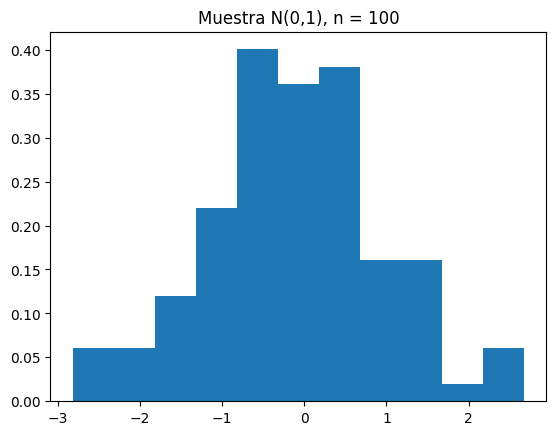

In [2]:
mu = 0
sigma = 1
n = 100

norm_sample = stats.norm.rvs(size=n,loc=mu,scale=sigma)

plt.hist(norm_sample, density=True, bins='auto')
plt.title('Muestra N(0,1), n = {}'.format(n))
plt.show()

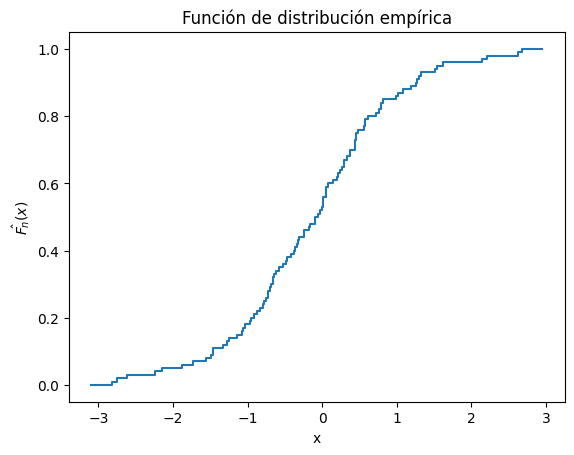

In [6]:
# acumulada F
F_hat = stats.ecdf(norm_sample)

#Para trabajar con la CDF invocamos al atributo cdf y graficamos
ax = plt.subplot()
F_hat.cdf.plot(ax)
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.show()

In [11]:
def confidence_interval_dkw(ecdf,alpha=0.05):
  L = []
  U = []
  n = len(ecdf.probabilities)
  epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
  for i in range(0,n):
    L_i = np.max([ecdf.probabilities[i]-epsilon_n,0])
    U_i = np.min([ecdf.probabilities[i]+epsilon_n,1])
    L.append(L_i)
    U.append(U_i)
  return L,U

low,up = confidence_interval_dkw(F_hat.cdf,alpha=0.05)

In [14]:
mean  = np.mean(norm_sample)
std = np.std(norm_sample)
se_mean = std/np.sqrt(n)

alpha = 0.05
#low = mean - stats.norm.ppf(1-alpha/2)*se_mean
#up = mean + stats.norm.ppf(1-alpha/2)*se_mean
low,up = confidence_interval_dkw(F_hat.cdf,alpha=alpha)

print('promedio =',mean)
print('error estándar del promedio =',se_mean)
#print('IC = ',[low,up])

promedio = -0.12328266338461841
error estándar del promedio = 0.1074277856110745


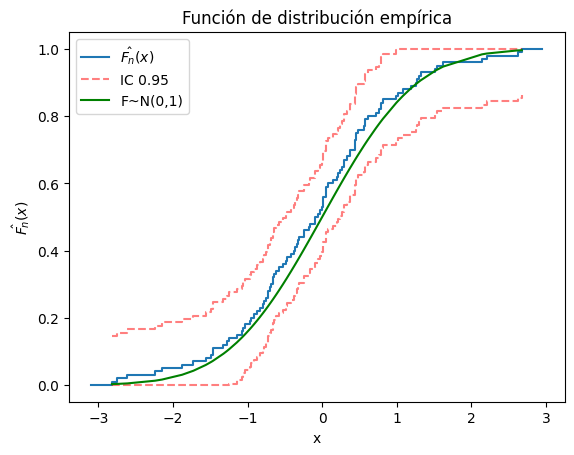

In [13]:
x = F_hat.cdf.quantiles

ax = plt.subplot()
F_hat.cdf.plot(ax,label=r'$\hat{F_n}(x)$')
ax.step(x,low,'r--',alpha=0.5,where='post',label='IC {}'.format(1-alpha))
ax.step(x,up,'r--',alpha=0.5,where='post')
ax.plot(x,stats.norm.cdf(x),color='g',label='F~N(0,1)')
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.legend()

In [ ]:
x = F_hat.cdf.quantiles
quantiles = stats.norm.cdf(x)

#print(x)
print(quantiles)

In [39]:
# Repetir esto 1000 veces y calcular la cuántas veces el intervalo de confianza contiene la verdadera función de distribución.
n_sims = 1_000
mu = 0
sigma = 1
n = 100


func_contenida = 0
for i in range(0, n_sims):
    norm_sample = stats.norm.rvs(size=n, loc=mu, scale=sigma)

    # estimacion cdf normal con las 100 muestras
    F_hat = stats.ecdf(norm_sample)
    x = F_hat.cdf.quantiles
    F = F_hat.cdf.probabilities

    alpha = 0.05
    low,up = confidence_interval_dkw(F_hat.cdf, alpha=alpha)
    
    # comparo cada punto con la verdadera CDF normal
    cdf_normal = stats.norm.cdf(x)  # devuelve la probabilidad de cada cuantil en la verdadera CDF normal
    dentro_intervalo = np.all((cdf_normal >= low) & (cdf_normal <= up))
    
    func_contenida += dentro_intervalo

#print(F)

proporcion_cobertura = func_contenida / n_sims
print("Proporción de veces que el intervalo cubre la verdadera FDA:", proporcion_cobertura)

Proporción de veces que el intervalo cubre la verdadera FDA: 0.962
